[Reference](https://levelup.gitconnected.com/meet-the-beyonce-of-python-graphing-libraries-1e068cb6076d)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

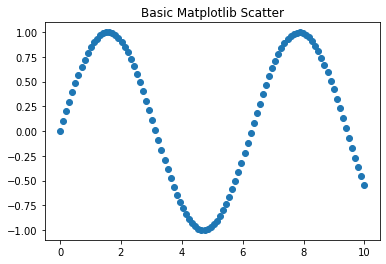

In [2]:
xaxis = np.linspace(0, 10, 100)
yaxis = np.sin(xaxis)
mat_scatter = plt.scatter(x=xaxis, y=yaxis)
plt.title('Basic Matplotlib Scatter')
plt.show();

In [3]:
plotly_scatter = px.scatter(x=xaxis, y=yaxis, title='Basic Plotly Scatter')
plotly_scatter.show()

In [4]:
df = px.data.iris()
setosa_df = df[df['species'] == 'setosa']
versicolor_df = df[df['species'] == 'versicolor']
virginica_df = df[df['species'] == 'virginica']

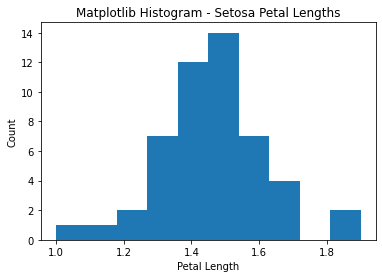

In [6]:
mat_hist = plt.hist(x=setosa_df['petal_length'])
plt.title('Matplotlib Histogram - Setosa Petal Lengths')
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.savefig('mat_hist.png')
plt.show();

In [8]:
!pip install -U kaleido

     |████████████████████████████████| 79.9 MB 124 kB/s 


In [10]:
plotly_hist = px.histogram(setosa_df, x='petal_length', title='Plotly Histogram - Setosa Petal Lengths', labels={'petal_length': 'Petal Length'})
plotly_hist.write_html('plotlyhistogram.html')
# plotly_hist.write_image('plotly_hist.png')
plotly_hist.show()

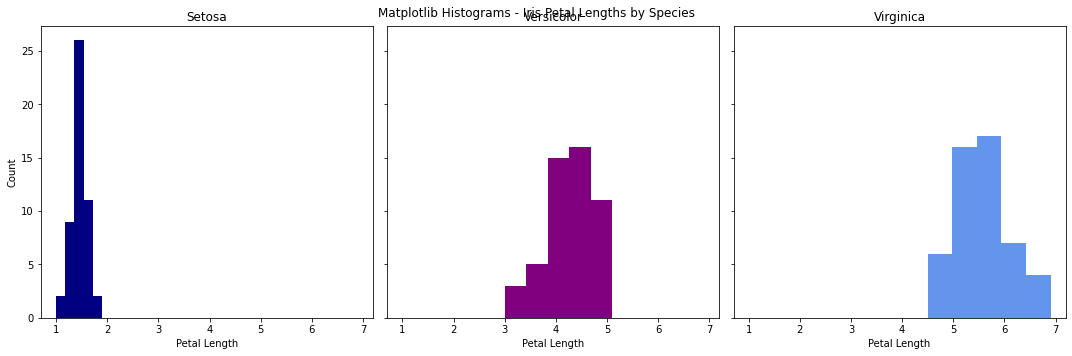

In [11]:
mat_hist_fig, axes = plt.subplots(ncols=3, figsize=(15,5), sharex=True, sharey=True)
mat_hist_fig.set_tight_layout(tight=True)
mat_hist_fig.suptitle('Matplotlib Histograms - Iris Petal Lengths by Species')
axes[0].hist(setosa_df['petal_length'], bins=5, color='navy')
axes[0].set_title('Setosa')
axes[0].set(ylabel='Count')
axes[0].set(xlabel='Petal Length')
axes[1].hist(versicolor_df['petal_length'], bins=5, color='purple')
axes[1].set_title('Versicolor')
axes[1].set(xlabel='Petal Length')
axes[2].hist(virginica_df['petal_length'], bins=5, color='cornflowerblue')
axes[2].set_title('Virginica')
axes[2].set(xlabel='Petal Length')
mat_hist_fig.savefig('mat_hist_fig.png');

In [13]:
plotly_hist_fig = make_subplots(rows=1, cols=3, subplot_titles=('Setosa', 'Versicolor', 'Virginica'), shared_yaxes=True, shared_xaxes=True, horizontal_spacing=.02)
plotly_hist_fig.update_layout(title_text='Plotly Histograms - Iris Petal Lengths by Species', showlegend=False, height=400)
plotly_hist_fig.update_xaxes(title_text='Petal Length', range=[0,8])
plotly_hist_fig.update_yaxes(title_text='Count', col=1)
plotly_hist_fig.add_trace(
    go.Histogram(x=setosa_df['petal_length'], name='Setosa', marker_color='navy', nbinsx=5),
    1, 1)
plotly_hist_fig.add_trace(
    go.Histogram(x=versicolor_df['petal_length'], name='Versicolor', marker_color='purple', nbinsx=5),
    1, 2)
plotly_hist_fig.add_trace(
    go.Histogram(x=virginica_df['petal_length'], name='Virginica', marker_color='cornflowerblue', nbinsx=5),
    1, 3)
# plotly_hist_fig.write_image('plotly_hist_fig.png')
plotly_hist_fig.show()

In [14]:
plotly_hist_anim = px.histogram(df, x='petal_length', nbins=5, title='Plotly Histogram - Iris Petal Lengths', labels={'petal_length': 'Petal Length'}, animation_frame='species', color='species', color_discrete_sequence=['navy', 'purple', 'cornflowerblue'])
plotly_hist_anim.update_layout(xaxis_range=(0, df['petal_length'].max()), yaxis_range=(0, 25))
plotly_hist_anim.write_html('plotly_hist_anim.html')
plotly_hist_anim.show()